# Time Series Analysis of Bitcoin Prices
Bitcoin, the digital currency, is known for its unpredictable value in the market. People are interested in predicting its future prices to make better decisions about buying or selling. In this project, we use Jupyter Notebook, a tool for data analysis, to explore and understand the patterns in Bitcoin prices. Our goal is to create a model that can help us forecast or estimate where the price of Bitcoin might be headed.

# About Dataset
There are 4857377 rows and 7 columns.

columns:
1.Time stamp: Start time of time window.

2.Open: Open price at start time window.

3.High: High price within time window.

4.Low: Low price within time window.

5.Close: Close price at end of time window.

6.Volume(currency): Volume of corresponding currency transacted in this window.

7.Weighted Price: Volume Weighted Average Price.




It contains the selected bitcoin exchanges for the time period of Jan 2012 to December Mar 2021,with minute to minute updates of (open,high,low,close),Volume in BTC and idicated currency and weighted bitcoin price.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\conne\OneDrive\Desktop\project\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [3]:
#Getting information of Dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [4]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [5]:
#Checking null values
print(df.isnull().sum())
print()
print((df.isnull().sum()/len(df))*100)

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

Timestamp             0.00000
Open                 25.60246
High                 25.60246
Low                  25.60246
Close                25.60246
Volume_(BTC)         25.60246
Volume_(Currency)    25.60246
Weighted_Price       25.60246
dtype: float64


It contains lots of null value.The assume reason for the null value is that can be the exchange(or its API) did not exist, or some other technical error.

In [6]:
#Dealing with the null values using Imputation with Median
df=df.fillna(df.median())
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [7]:
#Converting the Unix time to a human-readable date and time format using 'datetime' module
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 07:53:00,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
2,2011-12-31 07:54:00,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
3,2011-12-31 07:55:00,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
4,2011-12-31 07:56:00,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [8]:
#Set the Timestamp column as the Index of the Dataset.
df.set_index('Timestamp',inplace=True)

In [9]:
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 07:53:00,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
2011-12-31 07:54:00,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
2011-12-31 07:55:00,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
2011-12-31 07:56:00,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


# Exploratory Data Analysis (EDA)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Bitcoin Open price over the time')

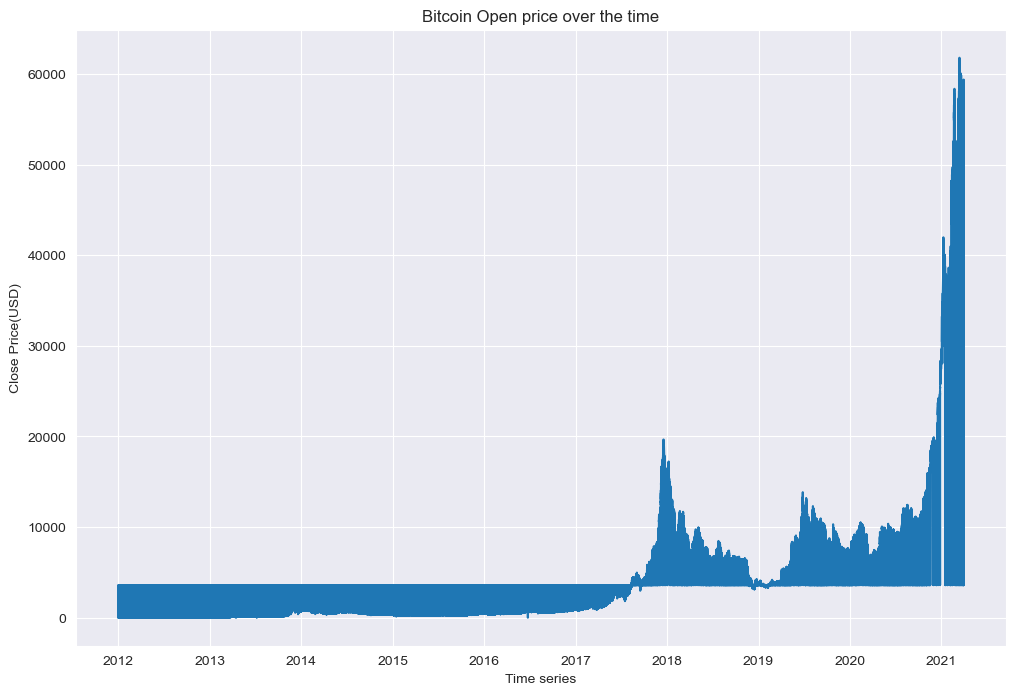

In [11]:
plt.figure(figsize=(12,8))
plt.plot(df.index,df['Close'])
plt.xlabel('Time series')
plt.ylabel('Close Price(USD)')
plt.title("Bitcoin Open price over the time")

The current graph appears messy or difficult to interpret,So we  can consider changing the time interval to months or days to provide a clearer representation of the data.

In [12]:
#Resampling the data into Days,months and year wise
df_daily=df.resample('D').mean()
df_monthly=df.resample('M').mean()
df_yearly=df.resample('Y').mean()


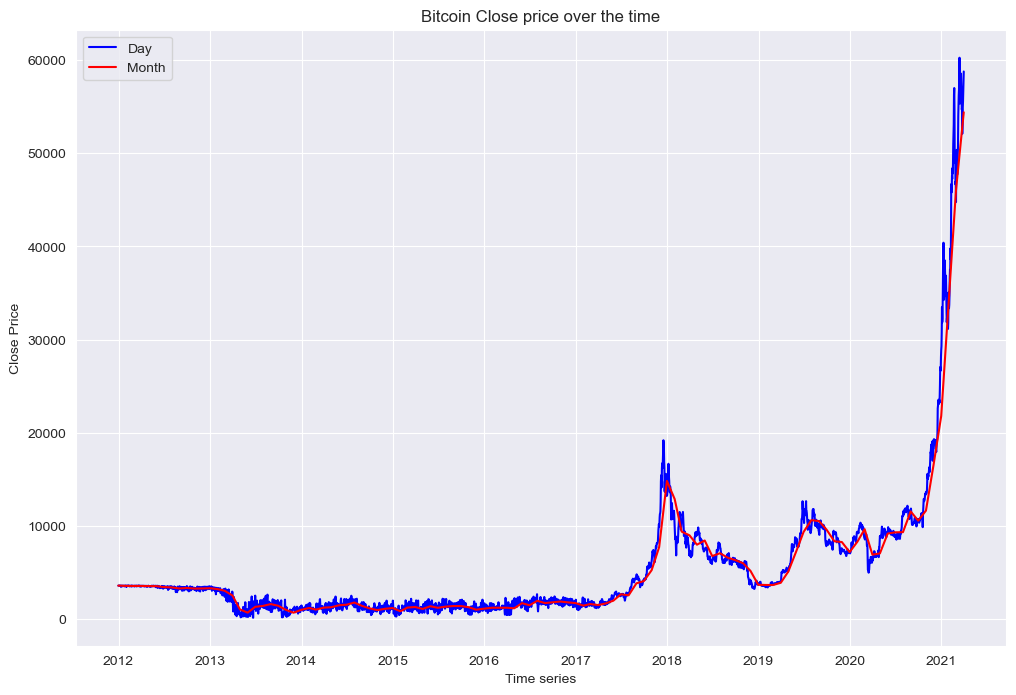

In [13]:
#Plotting the graph Close vs Bitcoin over the time 
plt.figure(figsize=(12,8))
plt.plot(df_daily['Close'],color='blue')
plt.plot(df_monthly['Close'],color='red')
plt.xlabel('Time series')
plt.ylabel('Close Price')
plt.title("Bitcoin Close price over the time")
plt.legend(['Day','Month'])


The updated graph with both daily (blue line) and monthly (red line) Bitcoin open prices provides a clearer view of the price trends over time. The monthly data smooths out some of the daily volatility, making it easier to see the overall trend. Both lines show the same general pattern, with significant growth in late 2017, a period of volatility, and a sharp increase starting in late 2020. The monthly line, being smoother, may be more useful for identifying long-term trends, while the daily line can highlight short-term fluctuations.

In [14]:
#Taking the difference of Open price of the bitcoin and the Close price
diff=df['Open']-df['Close']
diff.values

array([ 0.000e+00, -3.000e-02, -3.000e-02, ..., -3.041e+01, -1.841e+01,
       -1.043e+01])

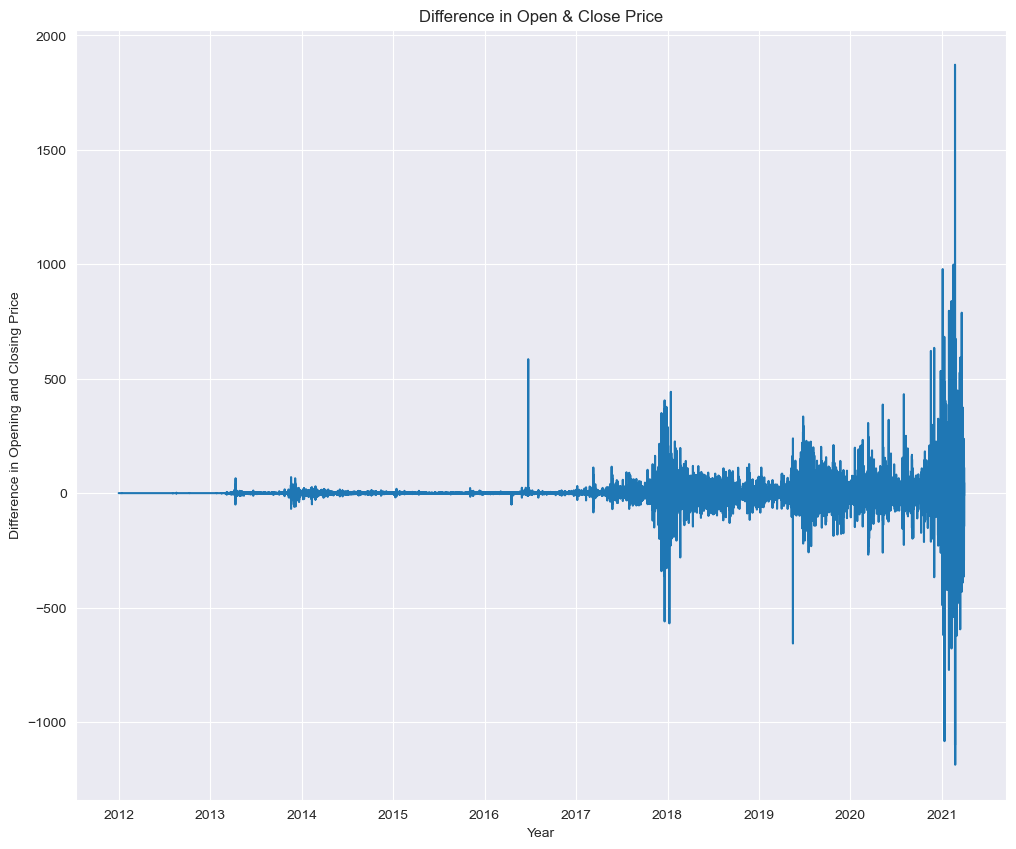

In [15]:
plt.figure(figsize=(12,10))
plt.plot(df.index,diff.values)
plt.title("Difference in Open & Close Price")
plt.xlabel('Year')
plt.ylabel('Difference in Opening and Closing Price')
plt.show()


At starting the daily difference between the opening and closing prices is relatively small,In the later years, particularly around 2021, there is an increase in the frequency and magnitude of these spikes and dips, indicating more frequent and larger daily price movements.

In [16]:
#Difference of the High and Low Price of the Bitcoin.
di=df['High']-df['Low']
di.values

array([ 0.  ,  2.57,  2.57, ..., 30.41, 28.2 , 22.21])

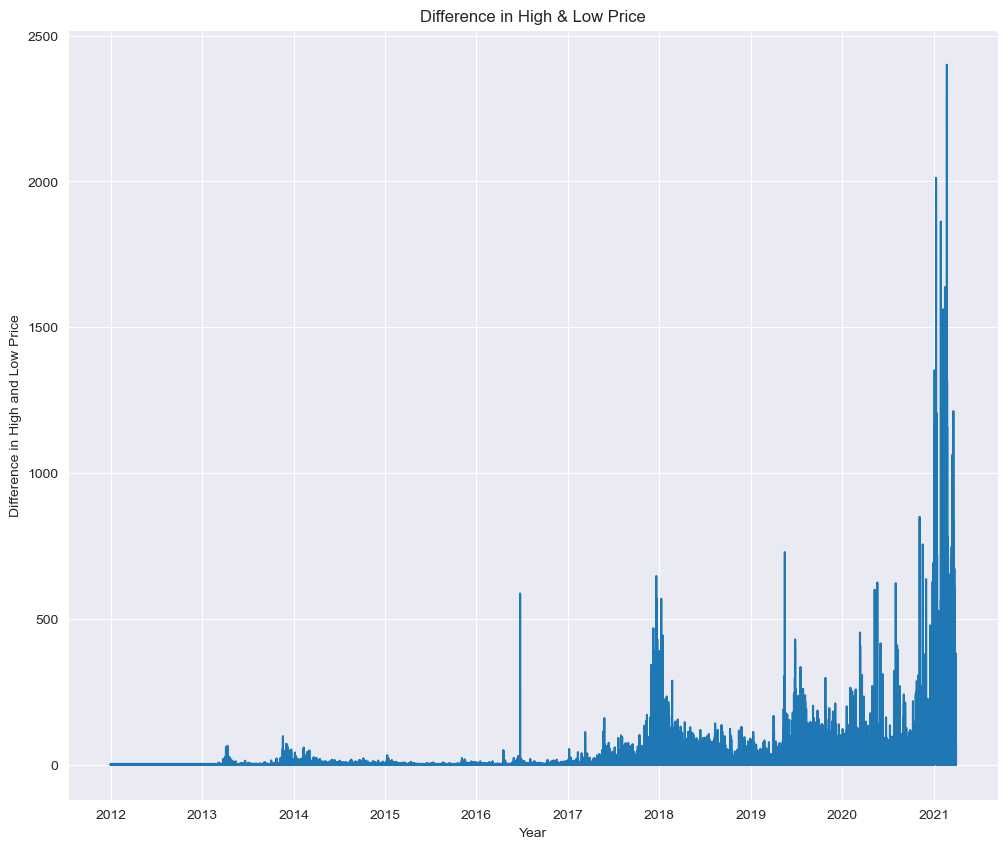

In [17]:
plt.figure(figsize=(12,10))
sns.lineplot(x=df.index,y=di.values)
plt.title("Difference in High & Low Price")
plt.xlabel('Year')
plt.ylabel('Difference in High and Low Price')
plt.show()

In [18]:
dd=df_monthly['Open']-df_monthly['Close']
dd

Timestamp
2011-12-31   -0.029948
2012-01-31   -0.029672
2012-02-29   -0.029562
2012-03-31   -0.029580
2012-04-30   -0.029471
                ...   
2020-11-30   -0.244222
2020-12-31   -0.403568
2021-01-31   -0.126636
2021-02-28   -0.561771
2021-03-31   -1.222211
Freq: M, Length: 112, dtype: float64

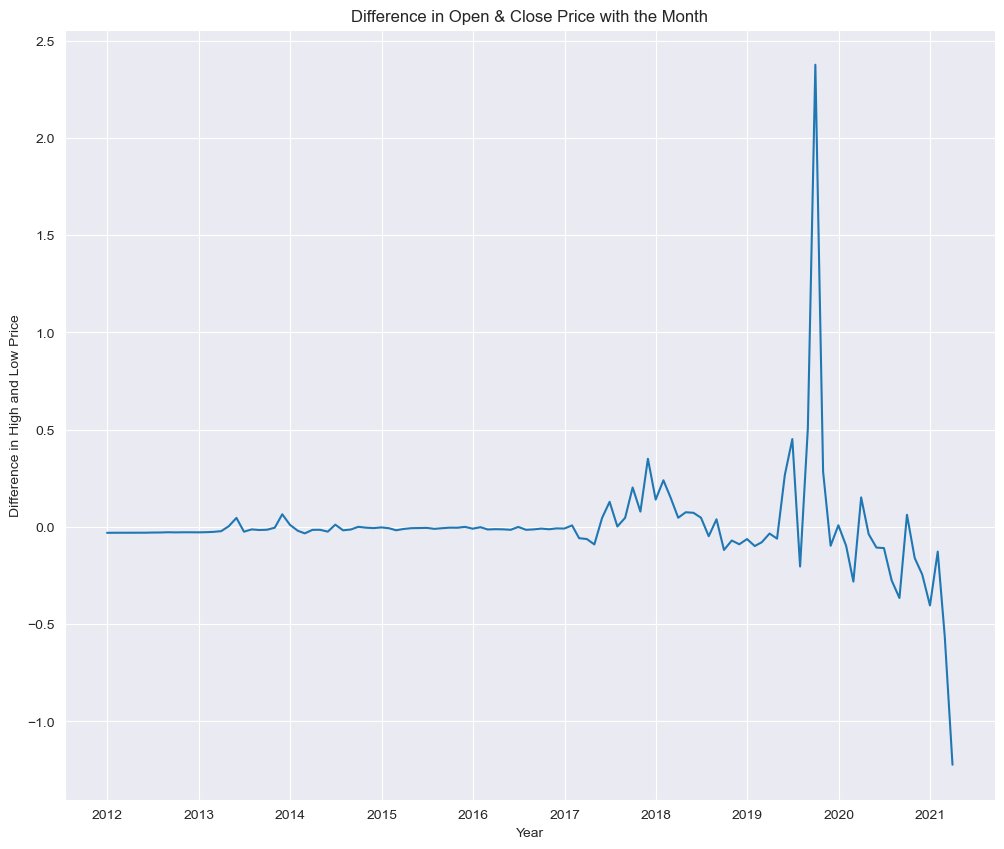

In [19]:
plt.figure(figsize=(12,10))
plt.plot(df_monthly.index,dd.values)
plt.title("Difference in Open & Close Price with the Month")
plt.xlabel('Year')
plt.ylabel('Difference in High and Low Price')
plt.show()

Similar graph to the difference in Open & Close price with a update to Month wise price of Bitcoin.

In [20]:
dif=df_monthly['High']-df_monthly['Low']
dif

Timestamp
2011-12-31     2.559452
2012-01-31     2.541244
2012-02-29     2.534554
2012-03-31     2.535915
2012-04-30     2.524834
                ...    
2020-11-30    20.032671
2020-12-31    29.213140
2021-01-31    81.630819
2021-02-28    81.755019
2021-03-31    71.028180
Freq: M, Length: 112, dtype: float64

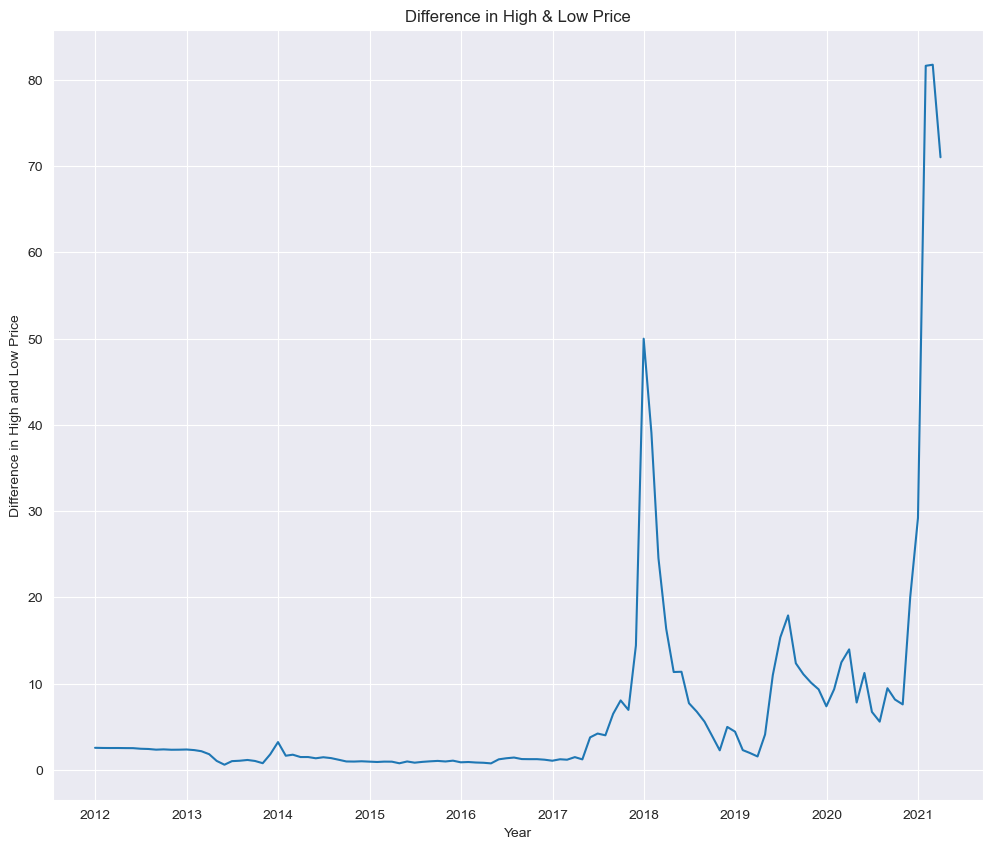

In [21]:
plt.figure(figsize=(12,10))
plt.plot(df_monthly.index,dif.values)
plt.title("Difference in High & Low Price")
plt.xlabel('Year')
plt.ylabel('Difference in High and Low Price')
plt.show()

In [22]:
#Average price of Bitcoin over the year
average_price_by_year=df_yearly['Open']
average_price_by_year

Timestamp
2011-12-31     3582.124938
2012-12-31     3415.741050
2013-12-31     1563.367559
2014-12-31     1271.369521
2015-12-31     1211.333848
2016-12-31     1567.334264
2017-12-31     4110.327893
2018-12-31     7426.674148
2019-12-31     7301.359063
2020-12-31    10985.680564
2021-12-31    44854.408484
Freq: A-DEC, Name: Open, dtype: float64

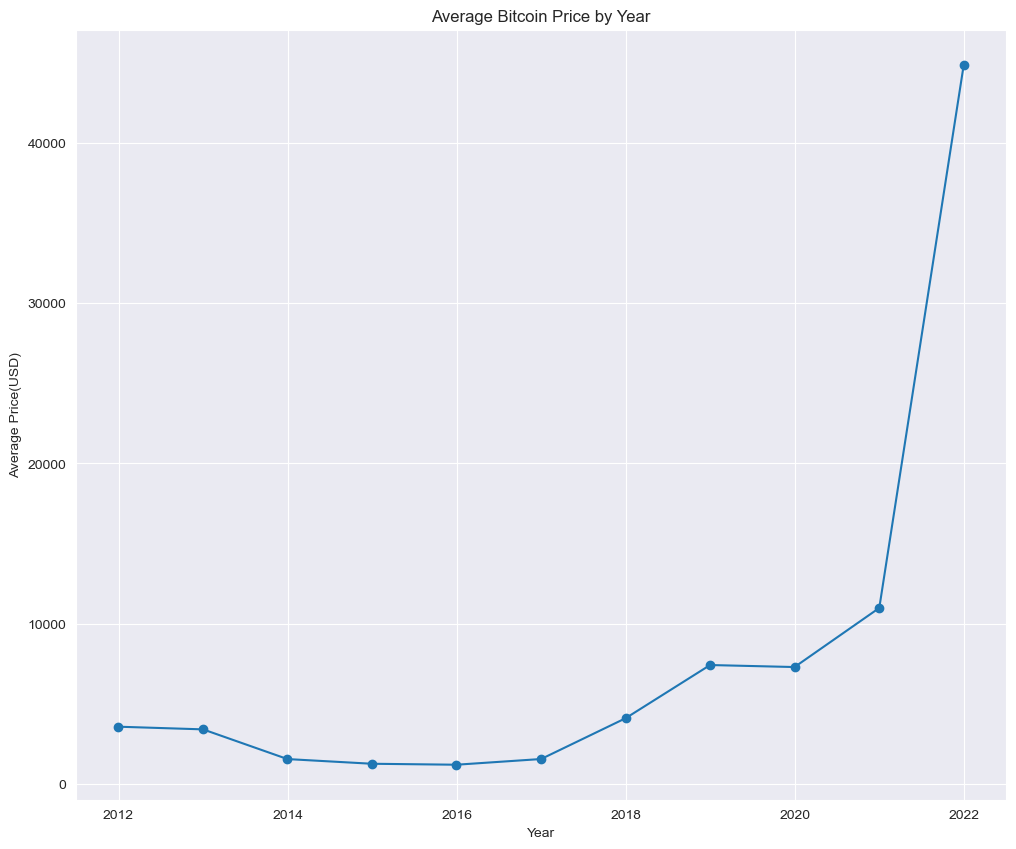

In [23]:
plt.figure(figsize=(12,10))
plt.plot(df_yearly.index,average_price_by_year,marker='o')
plt.title('Average Bitcoin Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price(USD)')
plt.show()

It show the average Price of the Bitcoin over the year increases.

<Figure size 1200x1000 with 0 Axes>

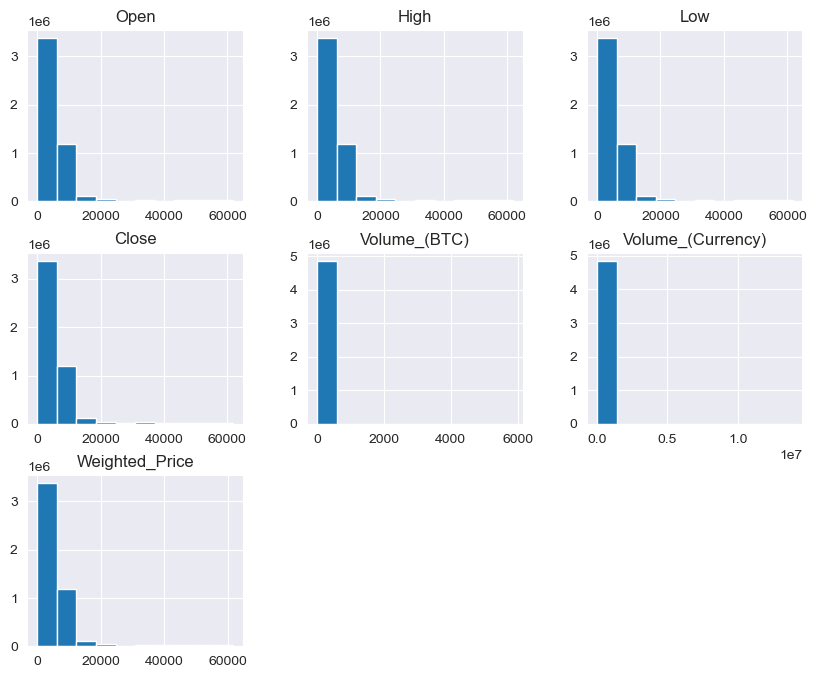

In [24]:
df.describe()
plt.figure(figsize=(12,10))
df.hist(figsize=(10,8))
plt.show()

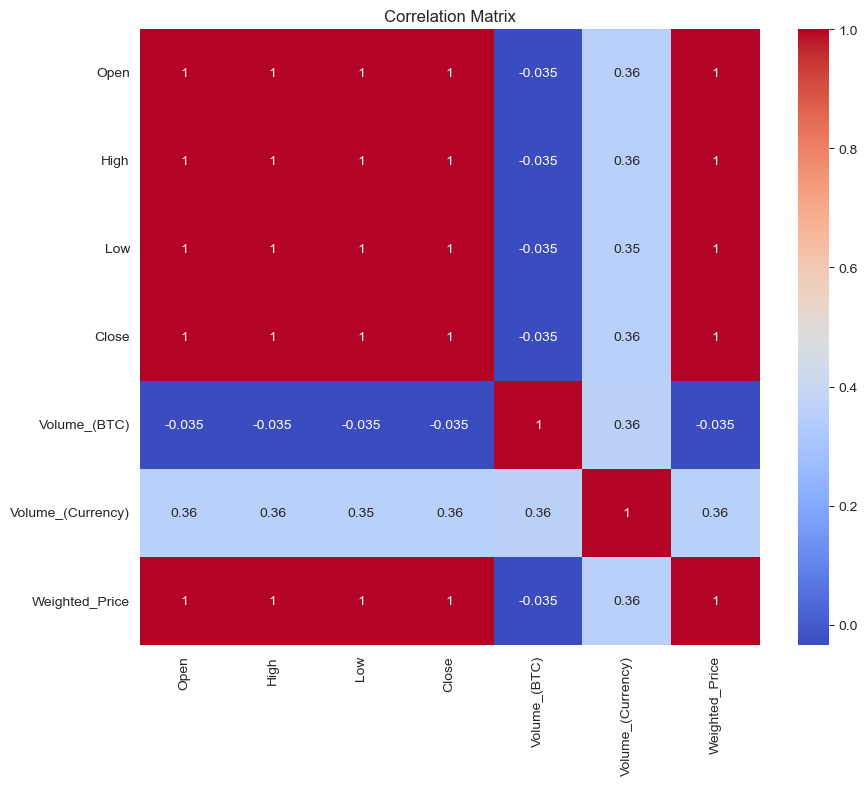

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999999,0.999999,0.999999,-0.034782,0.355125,0.999999
High,0.999999,1.000000,0.999998,0.999999,-0.034634,0.355547,0.999999
Low,0.999999,0.999998,1.000000,0.999999,-0.034967,0.354596,1.000000
Close,0.999999,0.999999,0.999999,1.000000,-0.034800,0.355087,1.000000
Volume_(BTC),-0.034782,-0.034634,-0.034967,-0.034800,1.000000,0.361851,-0.034808
Volume_(Currency),0.355125,0.355547,0.354596,0.355087,0.361851,1.000000,0.355063
Weighted_Price,0.999999,0.999999,1.000000,1.000000,-0.034808,0.355063,1.000000


In [25]:
correlation_matrix=df.corr()
#print(correlation_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
(correlation_matrix)

It show the positive correlation among Open,Close,High and Low indicates a high degree of linearity between these variables.This is expected in financial time series data,where these values are closely related.

It also show the weak correlation between Close and Volume_(BTC) suggest that changes in the closing price are not strongly associated with the volume of Bitcoin trade in BTC.


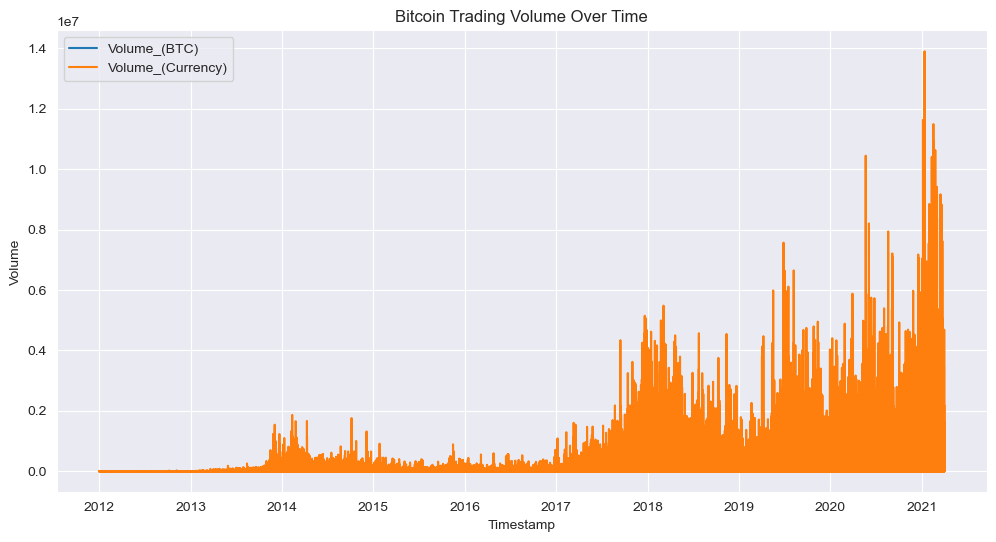

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume_(BTC)'], label='Volume_(BTC)')
plt.plot(df['Volume_(Currency)'], label='Volume_(Currency)')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.legend()
plt.show()


# Prediction of the Price over the time


In [27]:
X=df.drop('Close',axis=1)
y=df['Close']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [30]:
print('Training Model : Linear Regression')
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Mean squared error',mean_squared_error(y_pred,y_test))
print('Mean absolute error',mean_absolute_error(y_pred,y_test))
print('R-squared score',r2_score(y_pred,y_test))


Training Model : Linear Regression
Mean squared error 37.782456510887236
Mean absolute error 2.0029011853930485
R-squared score 0.999999383197988


In [31]:
print('Training Model: Decision Tree Regression')
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Mean squared error',mean_squared_error(y_pred,y_test))
print('Mean absolute error',mean_absolute_error(y_pred,y_test))
print('R-squared score',r2_score(y_pred,y_test))

Training Model: Decision Tree Regression
Mean squared error 82.0147046340002
Mean absolute error 2.6186292980989787
R-squared score 0.9999986611056395


In [32]:
print('Training Model: XGBRegression')
model=XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Mean squared error',mean_squared_error(y_pred,y_test))
print('Mean absolute error',mean_absolute_error(y_pred,y_test))
print('R-squared score',r2_score(y_pred,y_test))

Training Model: XGBRegression
Mean squared error 37127.19820477633
Mean absolute error 45.646742832750896
R-squared score 0.9993935847831821


# Pick the best Model

In [34]:
#Display the different parameter of the model
model=LinearRegression()
model.fit(X_train,y_train)
print(model)

LinearRegression()


LinearRegression model has mean squared error of 37.78 and the mean absolute error 2,therefore it is not 100% accurate,but better than the other model.


### Prediction for new data

In [35]:
new_data=[[2500,5000,1300,520,4560,3000]]
model.predict(new_data)

C:\Users\conne\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3602.13981035])